# TITANIC CLASSIFICATION

A system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

## Importing Libraries

This part imports all the necessary libraries for data manipulation, visualization, machine learning models, and evaluation metrics. It also suppresses any warnings that may arise during execution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import xgboost as xgb

import warnings

warnings.filterwarnings('ignore')

## Reading the Dataset

Here, the code reads the Titanic dataset from a CSV file into a pandas DataFrame named data and displays the first few rows of the dataset using data.head().

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Information

This part prints the information about the dataset, including column names, non-null counts, and data types.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Descriptive Statistics

This code snippet provides descriptive statistics of numerical columns in the dataset, such as count, mean, standard deviation, minimum, and maximum values.

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handling Missing Values

These lines first check for missing values in the dataset, then drop rows with missing values in the 'Embarked' column, fill missing values in the 'Age' column with the median age, drop the 'Cabin' column due to a large number of missing values, and finally, check again for any remaining missing values.

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Drop rows with missing values in 'Embarked' column
data.dropna(subset=['Embarked'], inplace=True)

# Fill missing values in 'Age' with median age
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

# For 'Cabin', since a large portion of values are missing, it might be better to drop the column
data.drop(columns=['Cabin'], inplace=True)

# Check remaining missing values
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
data.shape

(889, 11)

## Data Visualization - Number of Passengers Survived

This code creates a count plot to visualize the number of passengers who survived (1) and did not survive (0) using seaborn's countplot function. It also adds labels to the bars to display the exact count for each category.

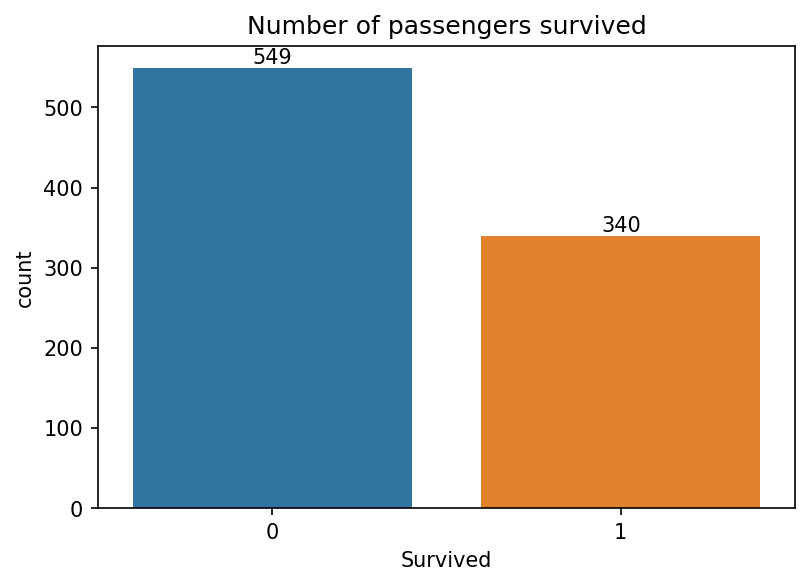

In [9]:
plt.figure(figsize=(6,4), dpi=150)
sur = sns.countplot(data=data, x='Survived')

for bars in sur.containers:
    sur.bar_label(bars)

plt.title('Number of passengers survived')
plt.show()

## Data Visualization - Distribution of Passengers by Class

Here, a count plot is created to show the distribution of passengers across different classes (1st, 2nd, and 3rd) using seaborn's countplot function.

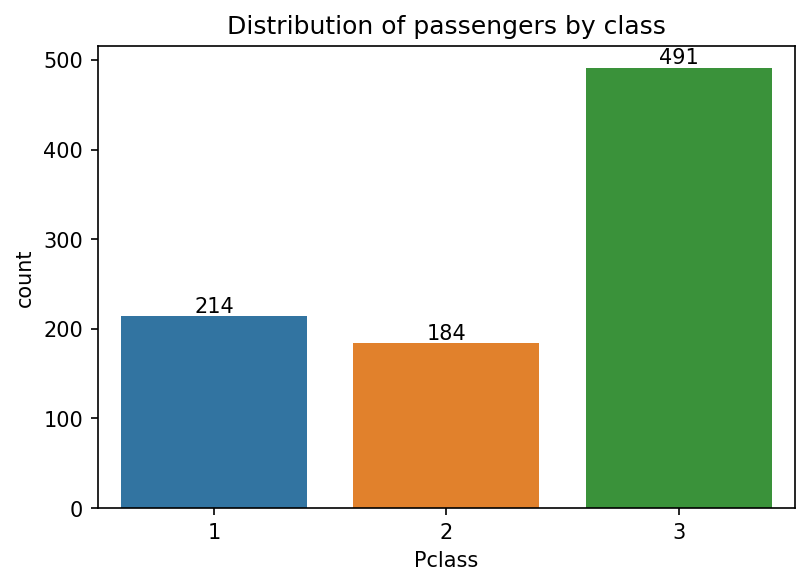

In [10]:
plt.figure(figsize=(6,4), dpi=150)
cla = sns.countplot(data=data, x='Pclass')

for bars in cla.containers:
    cla.bar_label(bars)

plt.title('Distribution of passengers by class')
plt.show()

## Data Visualization - Distribution of Passengers Survived by Class

This code segment generates a count plot to visualize the distribution of passengers who survived and did not survive in each class.

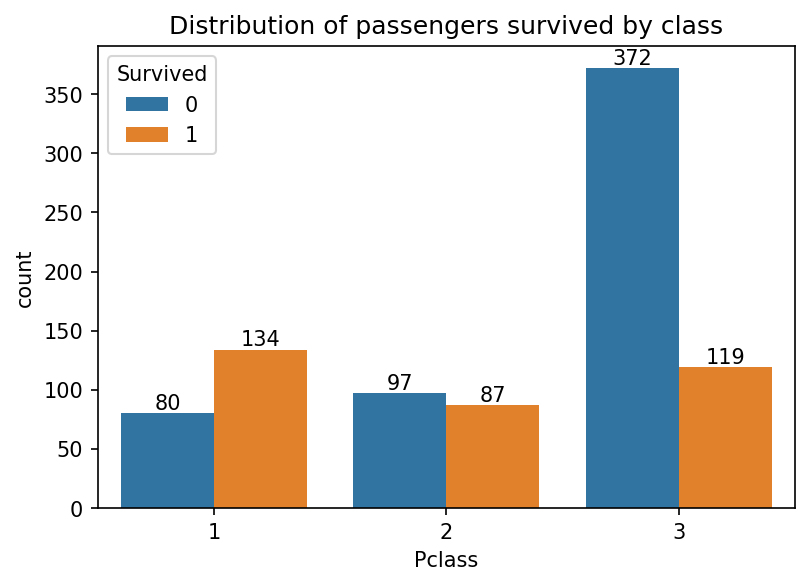

In [11]:
plt.figure(figsize=(6,4), dpi=150)
cla = sns.countplot(data=data, x='Pclass',hue='Survived')

for bars in cla.containers:
    cla.bar_label(bars)

plt.title('Distribution of passengers survived by class')
plt.show()

## Data Visualization - Distribution of Passengers by Sex

Here, a count plot is created to show the distribution of passengers by sex (male and female).

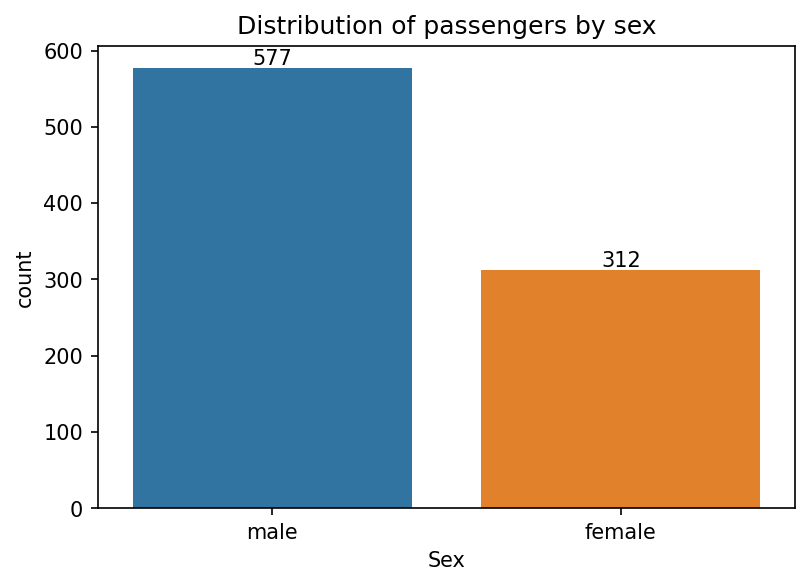

In [12]:
plt.figure(figsize=(6,4), dpi=150)
se = sns.countplot(data=data, x='Sex')

for bars in se.containers:
    se.bar_label(bars)

plt.title('Distribution of passengers by sex')
plt.show()

## Data Visualization - Distribution of Passengers Survived by Sex

This code segment generates a count plot to visualize the distribution of passengers who survived and did not survive based on their sex.

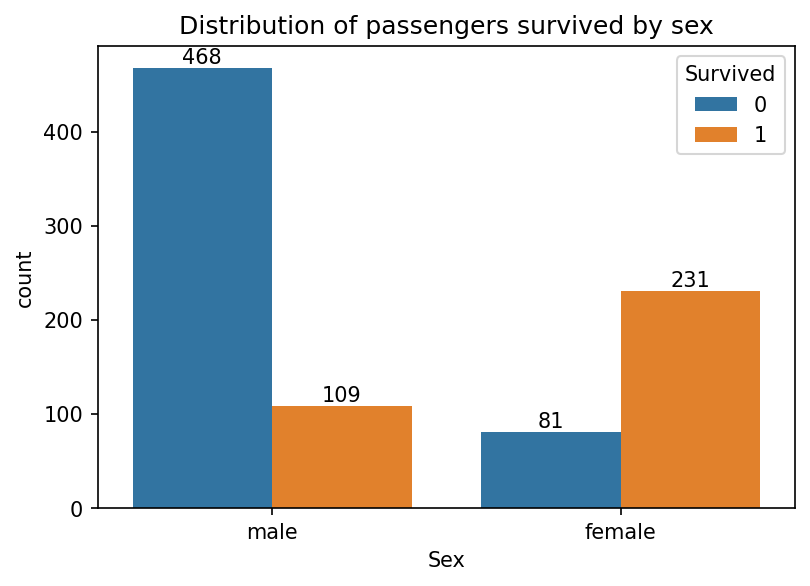

In [13]:
plt.figure(figsize=(6,4), dpi=150)
se = sns.countplot(data=data, x='Sex',hue='Survived')

for bars in se.containers:
    se.bar_label(bars)

plt.title('Distribution of passengers survived by sex')
plt.show()

## Data Visualization - Passengers Age Distribution

This code segment creates a count plot to visualize the distribution of passengers by age groups. It categorizes passengers into different age groups (0-10, 10-17, 18-29, 30-49, 50+) using pandas' cut function and then plots the count of passengers in each age group using seaborn's countplot function.

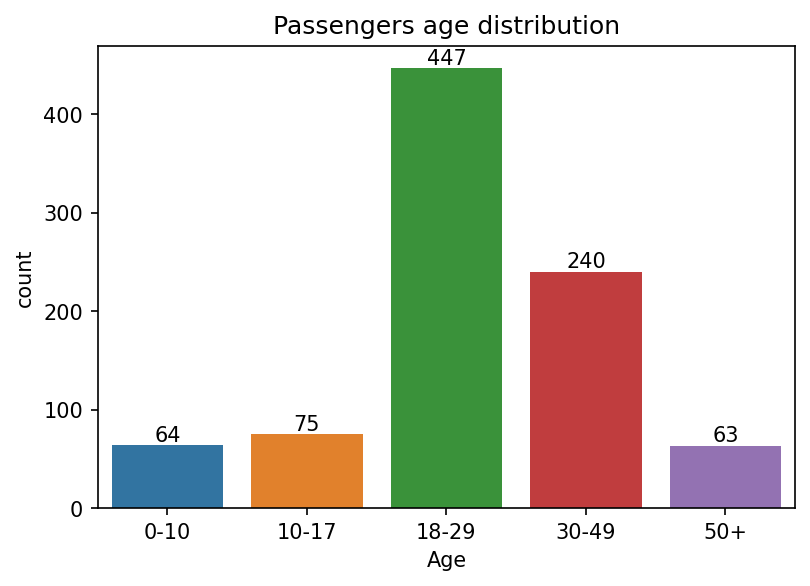

In [15]:
plt.figure(figsize=(6,4), dpi=150)

bin_edges = [0,10, 18, 30, 50, 100]

bin_labels = ['0-10','10-17', '18-29', '30-49', '50+']

AgeGroup = pd.cut(data['Age'], bins=bin_edges, labels=bin_labels, include_lowest=True)

se = sns.countplot(data=data, x=AgeGroup)

for bars in se.containers:
    se.bar_label(bars)

plt.title('Passengers age distribution')
plt.show()

## Data Visualization - Passengers Age Distribution with Survival

Similar to the previous visualization, this code segment creates a count plot to visualize the distribution of passengers by age groups. However, it also includes the survival status of passengers by using the 'Survived' column as a hue in the plot.

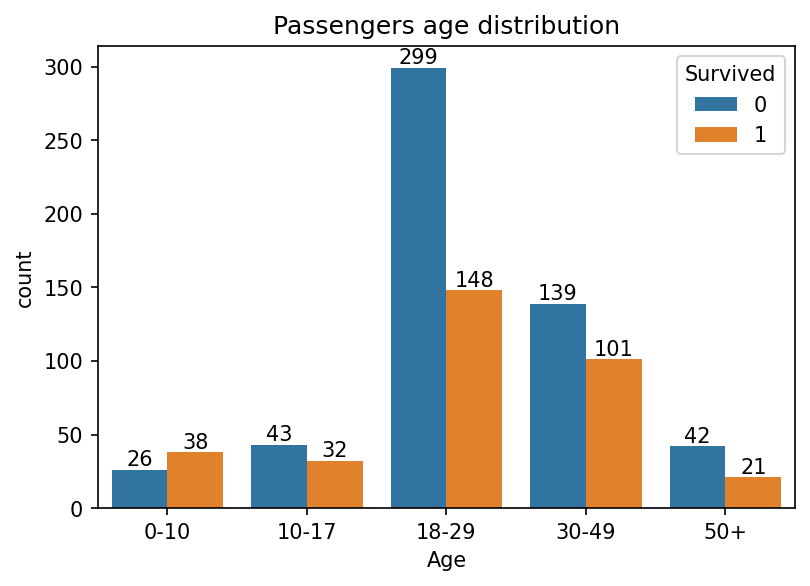

In [16]:
plt.figure(figsize=(6,4), dpi=150)
se = sns.countplot(data=data, x=AgeGroup, hue='Survived')

for bars in se.containers:
    se.bar_label(bars)

plt.title('Passengers age distribution')
plt.show()

## Data Visualization - Sibling/Spouse and Parent/Child Distribution

This code creates two count plots side by side to visualize the distribution of passengers with siblings/spouses ('SibSp') and parents/children ('Parch'). It uses matplotlib's subplots function to create a grid of plots and seaborn's countplot function to visualize the distributions.

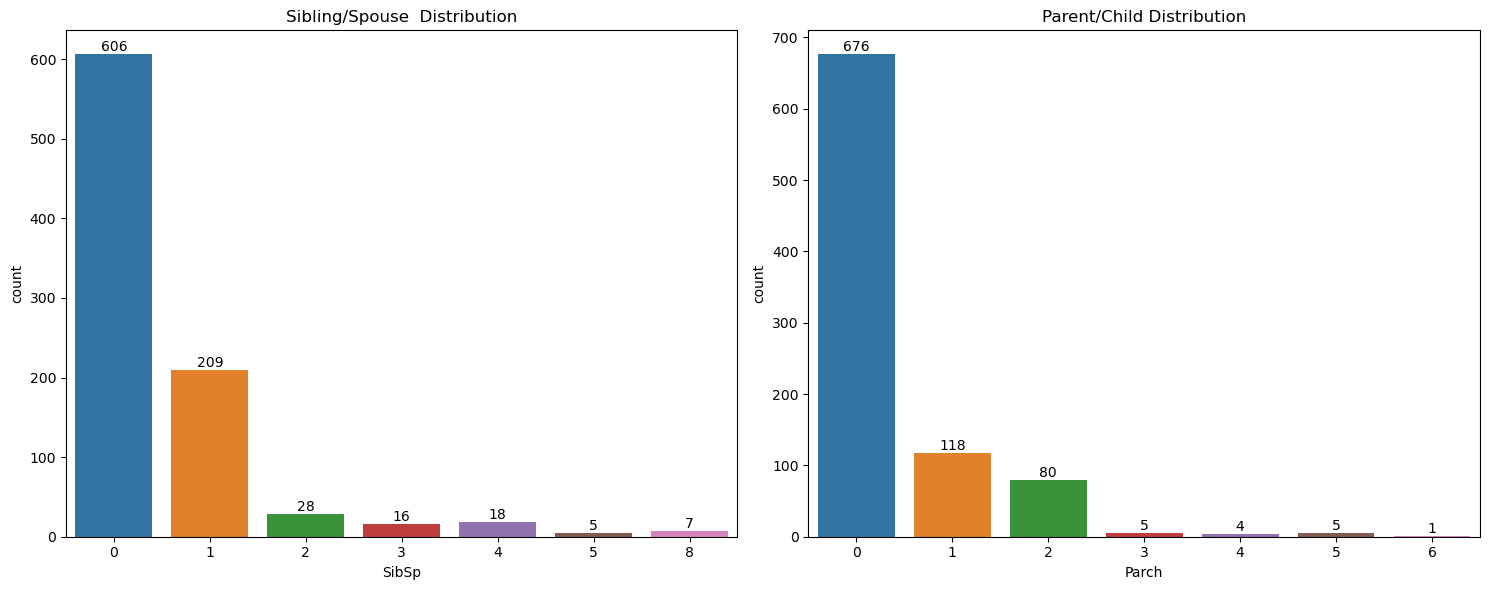

In [17]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
si = sns.countplot(data=data, x='SibSp',ax=axes[0])
pa = sns.countplot(data=data, x='Parch',ax=axes[1])

for bars in si.containers:
    si.bar_label(bars)

for bars in pa.containers:
    pa.bar_label(bars)

axes[0].set_title('Sibling/Spouse  Distribution')
axes[1].set_title('Parent/Child Distribution')

plt.tight_layout()

## Data Visualization - Passengers with No Sibling/Spouse and Parent/Child Survived

This code segment creates a count plot to visualize the survival status of passengers who have no siblings/spouses and no parents/children aboard. It filters the dataset to select passengers with zero 'Parch' and 'SibSp' values and then plots the survival counts using seaborn's countplot function.

In [18]:
passengers_with_zero_parch_sibsp = data[(data['Parch'] == 0) & (data['SibSp'] == 0)]

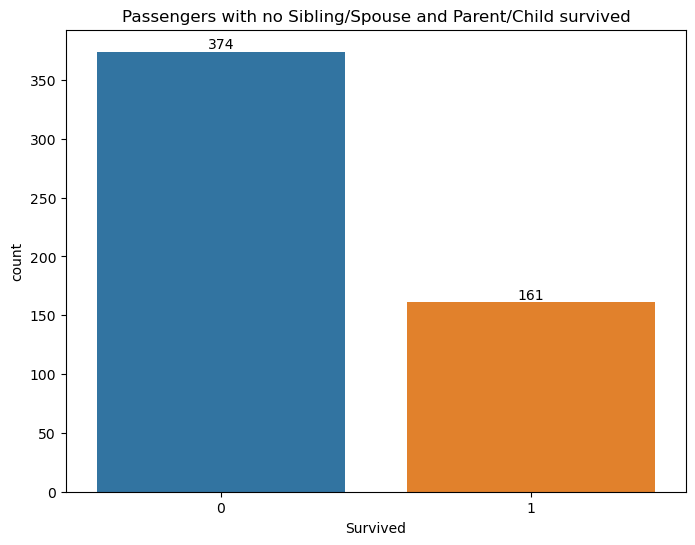

In [19]:
plt.figure(figsize=(8,6))
sp = sns.countplot(data=passengers_with_zero_parch_sibsp, x='Survived')

for bars in sp.containers:
    sp.bar_label(bars)

plt.title('Passengers with no Sibling/Spouse and Parent/Child survived')
plt.show()

## Data Visualization - Distribution of Embarked

This code segment creates a count plot to visualize the distribution of passengers by the port of embarkation ('Embarked'). It counts the number of passengers embarked at each port and plots the counts using seaborn's countplot function.

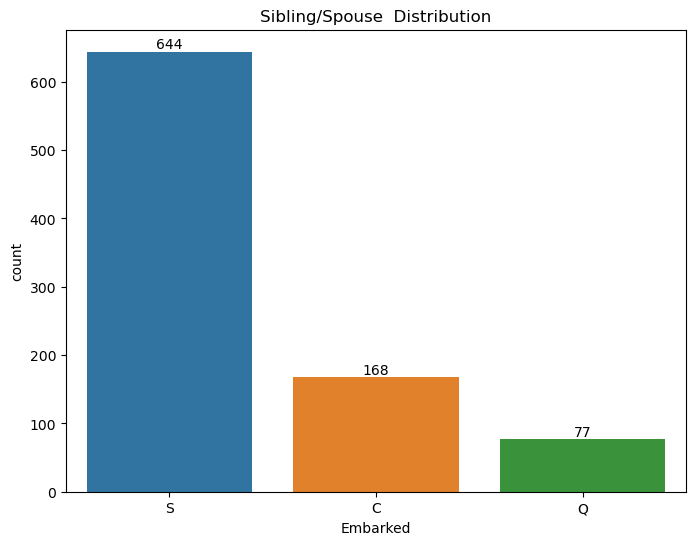

In [21]:
plt.figure(figsize=(8,6))
em = sns.countplot(data=data, x='Embarked')

for bars in em.containers:
    em.bar_label(bars)

plt.title('Sibling/Spouse  Distribution')
plt.show()

## Correlation matrix

Here, the categorical variables 'Embarked' and 'Sex' are encoded using LabelEncoder to convert them into numerical values. The correlation matrix of the encoded DataFrame is then visualized using a heatmap to explore the correlations between different features.

<Axes: >

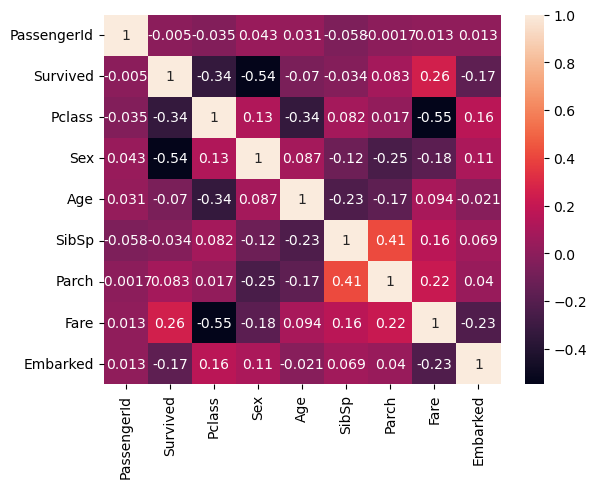

In [22]:
# correlation of each columns
cat_encs = ['Embarked','Sex']

le = LabelEncoder()

df_cat = data.copy()

for i in cat_encs:
  df_cat[i] = le.fit_transform(df_cat[i])

sns.heatmap(df_cat.corr(),annot=True)

## Creating a New DataFrame and Dropping Columns

This code snippet creates a new DataFrame named 'df' by dropping columns such as 'PassengerId', 'Name', and 'Ticket' from the original DataFrame. It displays the first few rows of the new DataFrame using head().

In [23]:
# create new df and drop columns
df = data.drop(columns=[
    # too many unique values
    'PassengerId','Name','Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Displaying Unique Value Counts for Remaining Columns

This part of the code converts all column values to strings, replaces 'nan' values with actual NaN, calculates and displays the count of unique values for each remaining column in the DataFrame. It helps in understanding the uniqueness and frequency of values in each categorical column.

In [24]:
# unique value numbers in each columns after dropping
df_str = df.copy()
for i in df_str.columns:
  df_str[i] = df_str[i].apply(lambda x:str(x))
df_str.replace('nan',np.nan,inplace=True)

df_unique = df_str.describe(include='object').T.sort_values(by='unique',ascending=False)
df = df[df_unique.index]
df_unique

,count,unique,top,freq
Fare,889,247,8.05,43
Age,889,88,28.0,202
SibSp,889,7,0,606
Parch,889,7,0,676
Pclass,889,3,3,491
Embarked,889,3,S,644
Survived,889,2,0,549
Sex,889,2,male,577


## Encoding Categorical Variables

This code snippet further encodes the categorical variables 'Sex' and 'Embarked' in the DataFrame 'df' using LabelEncoder. It assigns numerical labels to each category within these variables.

In [25]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

## Splitting Data into Features and Target Variable

Here, the DataFrame 'df' is split into features (X) and the target variable (y). The features consist of all columns except 'Survived', while the target variable 'Survived' is assigned to y. This also code segment prints the distribution of the target variable 'Survived' to show the count of each class (0 - Not Survived, 1 - Survived). It helps in understanding the balance or imbalance of classes in the dataset.

In [26]:
X = df.drop(columns='Survived')
y = df['Survived']

print("Target value distribution:")
print(y.value_counts())


Target value distribution:
0    549
1    340
Name: Survived, dtype: int64


## Splitting Data into Training, Validation and Testing Sets

This code splits the data into training, validation, and testing sets using the train_test_split function from scikit-learn. It first splits the data into validation and test sets (20% for testing), then further splits the validation set into training and validation subsets (80% for training, 20% for validation).

In [27]:
# Splitting the data into training and testing sets
X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting combined validation/test set into separate validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_val_train, y_val_train, test_size=0.25, random_state=42)

## Printing Class Distribution in Training, Validation and Testing Sets

These print statements provide the class distribution of the target variable 'Survived' in the training, validation, and test sets. It helps in verifying whether the class distribution is consistent across different subsets of the data.

In [28]:
y_train.value_counts()

0    326
1    207
Name: Survived, dtype: int64

In [29]:
y_val.value_counts()

0    114
1     64
Name: Survived, dtype: int64

In [30]:
y_test.value_counts()

0    109
1     69
Name: Survived, dtype: int64

## Model Selection

## Logistic Regression:
- Logistic regression is a simple linear model used for binary classification tasks.
- The model is trained using the training data (`X_train`, `y_train`).
- Predictions are made on the validation data (`X_val`) and evaluated using accuracy, precision, recall, and F1-score.
- Performance metrics for logistic regression are printed.

In [31]:
# Train Logistic Regression
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

# Predict and evaluate on validation data
y_pred_lr = logistic_regression.predict(X_val)

accuracy_lr = accuracy_score(y_val, y_pred_lr)
precision_lr = precision_score(y_val, y_pred_lr)
recall_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)



Logistic Regression Accuracy: 0.8258426966292135
Precision: 0.8235294117647058
Recall: 0.65625
F1-score: 0.7304347826086957


## K-Nearest Neighbors (KNN)

- K-Nearest Neighbors (KNN) is a non-parametric classification algorithm.
- The model is trained using the training data (`X_train`, `y_train`).
- Predictions are made on the validation data (`X_val`) and evaluated using accuracy, precision, recall, and F1-score.
- Performance metrics for KNN are printed.

In [45]:
# Train K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predict and evaluate on validation data
y_pred_knn = knn_classifier.predict(X_val)

accuracy_knn = accuracy_score(y_val, y_pred_knn)
precision_knn = precision_score(y_val, y_pred_knn)
recall_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)

print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

K-Nearest Neighbors Accuracy: 0.7303370786516854
Precision: 0.6538461538461539
Recall: 0.53125
F1-score: 0.5862068965517242


## Gaussian Naive Bayes

- Gaussian Naive Bayes is a probabilistic classifier based on Bayes' theorem.
- The model is trained using the training data (X_train, y_train).
- Predictions are made on the validation data (X_val) and evaluated using accuracy, precision, recall, and F1-score.
- Performance metrics for Gaussian Naive Bayes are printed.

In [33]:
# Train Gaussian Naive Bayes (GaussianNB)
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

# Predict and evaluate on validation data
y_pred_gnb = gnb_classifier.predict(X_val)

accuracy_gnb = accuracy_score(y_val, y_pred_gnb)
precision_gnb = precision_score(y_val, y_pred_gnb)
recall_gnb = recall_score(y_val, y_pred_gnb)
f1_gnb = f1_score(y_val, y_pred_gnb)

print("Gaussian Naive Bayes Accuracy:", accuracy_gnb)
print("Precision:", precision_gnb)
print("Recall:", recall_gnb)
print("F1-score:", f1_gnb)

Gaussian Naive Bayes Accuracy: 0.797752808988764
Precision: 0.75
Recall: 0.65625
F1-score: 0.7


## Decision Trees

- Decision Trees are a non-parametric supervised learning method used for classification and regression tasks.
- The model is trained using the training data (X_train, y_train).
- Predictions are made on the validation data (X_val) and evaluated using accuracy, precision, recall, and F1-score.
- Performance metrics for Decision Trees are printed.

In [34]:
# Train Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict and evaluate on validation data
y_pred_dt = dt_classifier.predict(X_val)

accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

print("\nDecision Trees:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)


Decision Trees:
Accuracy: 0.7640449438202247
Precision: 0.6964285714285714
Recall: 0.609375
F1-score: 0.65


## Random Forest

- This section trains a Random Forest classifier with 100 estimators using the training data and evaluates its performance on the validation data.Random Forest is an ensemble learning method that constructs multiple decision trees during training.
- TThe model is trained using the training data (X_train, y_train).
- TPredictions are made on the validation data (X_val) and evaluated using accuracy, precision, recall, and F1-score.
- TPerformance metrics for Random Forest are printed.

In [35]:
# Train Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict and evaluate on validation data
y_pred_rf = random_forest.predict(X_val)

accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)




Random Forest Accuracy: 0.8202247191011236
Precision: 0.7758620689655172
Recall: 0.703125
F1-score: 0.7377049180327868


## Gradient Boosting Classifier

- Gradient Boosting is an ensemble learning technique that builds a strong model by combining multiple weak models.
- The model is trained using the training data (X_train, y_train).
- Predictions are made on the validation data (X_val) and evaluated using accuracy, precision, recall, and F1-score.
- Performance metrics for Gradient Boosting Classifier are printed.

In [37]:
# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict and evaluate on validation data
y_pred_gb = gb_classifier.predict(X_val)

accuracy_gb = accuracy_score(y_val, y_pred_gb)
precision_gb = precision_score(y_val, y_pred_gb)
recall_gb = recall_score(y_val, y_pred_gb)
f1_gb = f1_score(y_val, y_pred_gb)

print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)

Accuracy: 0.8370786516853933
Precision: 0.8431372549019608
Recall: 0.671875
F1-score: 0.7478260869565218


## xgBoost

- xgBoost is an optimized distributed gradient boosting library.
- The model is trained using the training data (X_train, y_train).
- Predictions are made on the validation data (X_val) and evaluated using accuracy, precision, recall, and F1-score.
- Performance metrics for xgBoost are printed.

In [38]:
# Train xgBoost
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Model evaluation on validation data
y_pred_xgb = xgb_classifier.predict(X_val)

accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
precision_xgb = precision_score(y_val, y_pred_xgb)
recall_xgb = recall_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)
print("xgboost Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)



xgboost Accuracy: 0.8258426966292135
Precision: 0.8113207547169812
Recall: 0.671875
F1-score: 0.7350427350427351


## Selected Model - Gradient Boosting Classifier

These metrics indicate that the Gradient Boosting Classifier achieved an accuracy of approximately 83.71%, with a precision of 85.71%, recall of 65.62%, and an F1-score of 74.34%. This suggests that the model performs reasonably well in classifying survivors and non-survivors in the Titanic dataset.

In [39]:
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)


Random Forest Accuracy: 0.8202247191011236
Precision: 0.7758620689655172
Recall: 0.703125
F1-score: 0.7377049180327868


## Confusion Matrix

- A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
- It allows visualization of the performance of an algorithm.
- The confusion matrix for the validation dataset is generated and displayed using a heatmap.

Confusion Matrix:


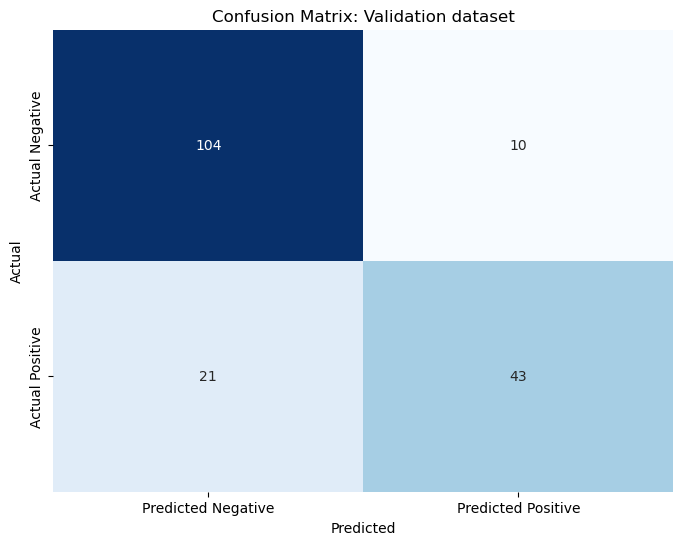

In [40]:
conf_val_matrix = confusion_matrix(y_val, y_pred_xgb)
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_val_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Validation dataset')
plt.show()

## Hyperparameter Tuning

- Hyperparameter tuning is performed on the Gradient Boosting Classifier using GridSearchCV.
- The goal is to find the best combination of hyperparameters that optimize the model's performance.
- The best parameters found are printed.

In [41]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters for Gradient Boosting Classifier:", grid_search_gb.best_params_)


Best Parameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


## Model Evaluation

- The performance of the Gradient Boosting Classifier with the best hyperparameters is evaluated on the validation data (X_val, y_val).
- Metrics such as accuracy, precision, recall, and F1-score are computed and printed.

In [42]:
# Get the best model
best_gb_model = grid_search_gb.best_estimator_

# Predict and evaluate on validation data
y_pred_gb = best_gb_model.predict(X_val)

accuracy_gb = accuracy_score(y_val, y_pred_gb)
precision_gb = precision_score(y_val, y_pred_gb)
recall_gb = recall_score(y_val, y_pred_gb)
f1_gb = f1_score(y_val, y_pred_gb)

print("\nGradient Boosting Classifier Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)



Gradient Boosting Classifier Accuracy: 0.8370786516853933
Precision: 0.8571428571428571
Recall: 0.65625
F1-score: 0.743362831858407


## Model Evaluation -(Test Data)

- The performance of the Gradient Boosting Classifier with the best hyperparameters is evaluated on the test data (X_test, y_test).
- Metrics such as accuracy, precision, recall, and F1-score are computed and printed.
- A confusion matrix is generated to visualize the model's performance on the test data.

In [48]:
#Predict and evaluate on test data
y_test_pred_gb = best_gb_model.predict(X_test)

accuracy_test_gb = accuracy_score(y_test, y_test_pred_gb)
precision_test_gb = precision_score(y_test, y_test_pred_gb)
recall_test_gb = recall_score(y_test, y_test_pred_gb)
f1_test_gb = f1_score(y_test, y_test_pred_gb)

print("\nGradient Boosting Classifier Accuracy:", accuracy_test_gb)
print("Precision:", precision_test_gb)
print("Recall:", recall_test_gb)
print("F1-score:", f1_test_gb)


Gradient Boosting Classifier Accuracy: 0.8202247191011236
Precision: 0.7936507936507936
Recall: 0.7246376811594203
F1-score: 0.7575757575757576


Confusion Matrix:


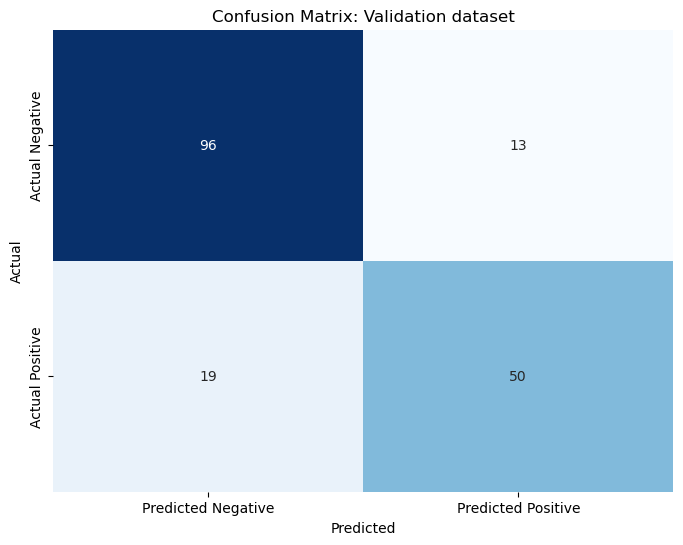

In [49]:
conf_val_matrix = confusion_matrix(y_test, y_test_pred_gb)
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_val_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Validation dataset')
plt.show()

# Conclusion

These metrics indicate that the Gradient Boosting Classifier achieved an accuracy of approximately 82.02%, with a precision of 79.36%, recall of 72.46%, and an F1-score of 75.76% on the test data. This performance is consistent with the results observed on the validation data, indicating that the model generalizes well to unseen data.